## Model Devolopment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
path = 'Automobiles_cleaned.csv'

df = pd.read_csv(path,index_col=0)
df.head(2)

,symboling,normalized_losses,make,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,city_mpg,highway_mpg,price,highway_mpL100km,city_L100km,Horse_power_binned,Fuel_Type_diesel,Fuel_type_GAS,aspiration_Std,aspiration_Turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,8.703704,11.190476,low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,8.703704,11.190476,low,0,1,1,0


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
#create liner regression

lm = LinearRegression()

#declare valibles...

X = df[['highway_mpL100km']]
Y = df['price']

lm.fit(X,Y)

LinearRegression()

In [18]:
#prediction...

preds =lm.predict(X)
print(Y.head().tolist())
preds[0:5]

[13495.0, 16500.0, 16500.0, 13950.0, 17450.0]


array([15485.52737455, 15485.52737455, 16643.34931414, 12475.19033163,
       22327.2024721 ])

### Y hat = a + bX

In [30]:
x = df[['engine_size']]
y = df[['price']]

lm1 = LinearRegression()
lm1.fit(x,y)
preds = lm1.predict(x)
print(preds[0:5])

[[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]
 [14729.62322775]]


In [43]:
a = lm1.intercept_
b = lm1.coef_

#formula for linear regression...
y_hat = a + b * 130
print(y_hat)  #here is the same as the linear regression formula out there...

[[13728.4631336]]


## Multiple linear regression

<li> $$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

In [51]:
Z = df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']]

lm2 = LinearRegression()
lm2.fit(Z,y)

LinearRegression()

In [54]:
a = lm2.intercept_
b = lm2.coef_

In [127]:
y_hat = a + ( b[0][1] * Z['horsepower'] +  b[0][2] * Z['curb_weight'] + \
b[0][2] * Z['engine_size'] + b[0][3] * Z['highway_mpg'])

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_hat,y)
y_hat[0:5]

0    203790.057851
1    203790.057851
2    228145.473823
3    184961.851470
4    226593.917056
dtype: float64

In [112]:
lm.fit(Z,Y)
lm.predict(Z)[0:5]

array([13698.95609311, 13698.95609311, 19056.78572196, 10621.59764327,
       15519.32197778])

In [93]:
import seaborn as sns

<AxesSubplot:ylabel='price'>

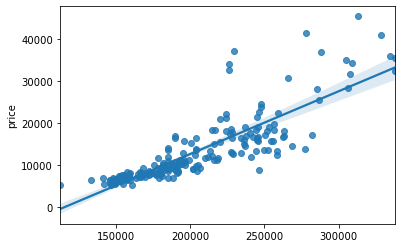

In [95]:
sns.regplot(x= y_hat,y=y)

<AxesSubplot:xlabel='highway_mpg', ylabel='price'>

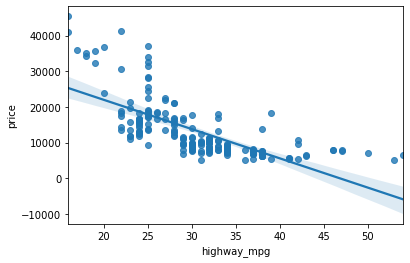

In [102]:
sns.regplot(x='highway_mpg',y='price',data=df)